In [3]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import os
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
DataSet = pd.read_csv('C:/Users/rohan/Desktop/Supply-chain/Dataset/invoice.csv').fillna(0)

In [3]:
TotalRowCount = len(DataSet)
print("Total Number of Data Count :", TotalRowCount)

Total Number of Data Count : 49


### ***Invoice Contents Simplified***

In [4]:
DataSet.dtypes

InvoiceID                       int64
ProductID                      object
City                           object
Fulfill Via                    object
Shipment Mode                  object
PO Sent to Vendor Date         object
Scheduled Delivery Date        object
Delivered to Client Date       object
Delivery Recorded Date         object
Vendor                         object
Item Description               object
Brand                          object
Unit of Measure (Per Pack)      int64
Line Item Quantity              int64
Line Item Value               float64
Pack Price                    float64
Unit Price                    float64
Manufacturing Site             object
Payment Status                 object
Weight (Kilograms)            float64
Freight Cost (Rupees)         float64
dtype: object

In [5]:
DataSet.head(10)

,InvoiceID,ProductID,City,Fulfill Via,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Vendor,Item Description,Brand,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,Payment Status,Weight (Kilograms),Freight Cost (Rupees)
0,1,100-CI-T01,Mumbai,Direct Drop,Air,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,R Fine LTD,brakes,Reveal,30,19,551.00,29.00,0.97,R Fine LTD,processing,13.00,780.34
1,3,108-VN-T01,Delhi,Direct Drop,Air,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,"Aurobindo Unit III, India",brakes,Generic,240,1000,"6,200.00",6.20,0.03,"Aurobindo Unit III, India",done,358.00,"4,521.50"
2,4,100-CI-T01,Kolkata,Direct Drop,Air,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,ABBVIE GmbH & Co.KG Wiesbaden,brakes,Determine,100,500,"40,000.00",80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,processing,171.00,"1,653.78"
3,15,108-VN-T01,Bangalore,Direct Drop,Air,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,R Fine LTD,brakes,Generic,60,31920,"127,360.80",3.99,0.07,R Fine LTD,processing,"1,855.00","16,007.06"
4,16,108-VN-T01,Mumbai,Direct Drop,Air,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,"Aurobindo Unit III, India",brakes,Generic,60,38000,"121,600.00",3.20,0.05,"Aurobindo Unit III, India",processing,"7,590.00","45,450.08"
5,23,112-NG-T01,Delhi,Direct Drop,Truck,Date Not Captured,28-Sep-06,28-Sep-06,28-Sep-06,ABBVIE GmbH & Co.KG Wiesbaden,engine,Generic,240,416,"2,225.60",5.35,0.02,ABBVIE GmbH & Co.KG Wiesbaden,done,504.00,"5,920.42"
6,44,110-ZM-T01,Kolkata,Direct Drop,Air,Date Not Captured,8-Jan-07,8-Jan-07,8-Jan-07,R Fine LTD,engine,Stocrin/Sustiva,90,135,"4,374.00",32.40,0.36,R Fine LTD,done,328.00,"28,672.81"
7,45,109-TZ-T01,Bangalore,Direct Drop,Air,Date Not Captured,24-Nov-06,24-Nov-06,24-Nov-06,"Aurobindo Unit III, India",engine,Generic,60,16667,"60,834.55",3.65,0.06,"Aurobindo Unit III, India",processing,"1,478.00","33,325.36"
8,46,112-NG-T01,Mumbai,Direct Drop,Air,Date Not Captured,7-Dec-06,7-Dec-06,7-Dec-06,ABBVIE GmbH & Co.KG Wiesbaden,engine,Generic,60,273,532.35,1.95,0.03,ABBVIE GmbH & Co.KG Wiesbaden,done,"2,439.21","37,977.92"
9,47,110-ZM-T01,Delhi,Direct Drop,Ship,11/13/06,30-Jan-07,30-Jan-07,30-Jan-07,R Fine LTD,engine,Aluvia,120,2800,"115,080.00",41.10,0.34,R Fine LTD,processing,"2,639.68","42,630.47"


In [6]:
DataSet.tail(10)

,InvoiceID,ProductID,City,Fulfill Via,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Vendor,Item Description,Brand,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,Payment Status,Weight (Kilograms),Freight Cost (Rupees)
39,392,104-CI-T01,Bangalore,Direct Drop,Air,3/3/08,19-Mar-09,19-Mar-09,19-Mar-09,"Aurobindo Unit III, India",tyres,Bioline,25,659,"13,180.00",20.00,0.80,"Aurobindo Unit III, India",processing,"8,653.61","182,207.12"
40,398,102-GY-T01,Mumbai,Direct Drop,Air,2/28/08,9-Apr-08,1-Apr-08,1-Apr-08,ABBVIE GmbH & Co.KG Wiesbaden,tyres,Generic,100,240,2.40,0.01,0.00,ABBVIE GmbH & Co.KG Wiesbaden,done,"8,854.07","186,859.67"
41,399,102-GY-T01,Delhi,Direct Drop,Air,2/28/08,28-Jul-08,28-Jul-08,28-Jul-08,R Fine LTD,tyres,Generic,100,213,2.13,0.01,0.00,R Fine LTD,done,"9,054.54","191,512.23"
42,400,117-ET-T01,Kolkata,Direct Drop,Air,2/29/08,11-Mar-08,11-Mar-08,11-Mar-08,"Aurobindo Unit III, India",tyres,Capillus,100,63,"13,399.25",212.69,2.13,"Aurobindo Unit III, India",processing,"9,255.00","196,164.78"
43,410,113-ZW-T01,Bangalore,Direct Drop,Air,3/17/08,17-Nov-08,17-Nov-08,17-Nov-08,ABBVIE GmbH & Co.KG Wiesbaden,tyres,Determine,100,1634,"117,631.66",71.99,0.72,ABBVIE GmbH & Co.KG Wiesbaden,done,"9,455.46","200,817.33"
44,411,123-NG-T01,Mumbai,Direct Drop,Truck,3/13/08,17-Apr-08,17-Apr-08,17-Apr-08,R Fine LTD,brakes,Stat-Pak,20,1425,"38,475.00",27.00,1.35,R Fine LTD,processing,"9,655.93","205,469.89"
45,414,119-NA-T01,Delhi,Direct Drop,Air,3/18/08,4-Jun-08,4-Jun-08,4-Jun-08,"Ci, India",engine,Determine,100,142,"10,222.58",71.99,0.72,"Ci, India",processing,"9,856.39","210,122.44"
46,420,108-VN-T01,Kolkata,Direct Drop,Air,3/31/08,3-Jun-08,3-Jun-08,3-Jun-08,ABBVIE GmbH & Co.KG Wiesbaden,lights,Generic,30,8400,"96,432.00",11.48,0.38,ABBVIE GmbH & Co.KG Wiesbaden,processing,"10,056.86","214,775.00"
47,422,116-ZA-T01,Bangalore,Direct Drop,Air,2/20/08,24-Apr-08,24-Apr-08,24-Apr-08,"BMS Meymac, France",tyres,Invirase,270,6,405.06,67.51,0.25,"BMS Meymac, France",done,"10,257.32","219,427.55"
48,423,116-ZA-T01,Mumbai,Direct Drop,Ship,2/20/08,24-Apr-08,24-Apr-08,24-Apr-08,R Fine LTD,brakes,Zerit,200,600,870.00,1.45,0.01,R Fine LTD,done,"10,457.79","224,080.11"


### ***Number of Transactions Per City***

City Wise Count 

Mumbai       13
Delhi        12
Kolkata      12
Bangalore    12
Name: City, dtype: int64


Text(0.5, 0, 'City Name')

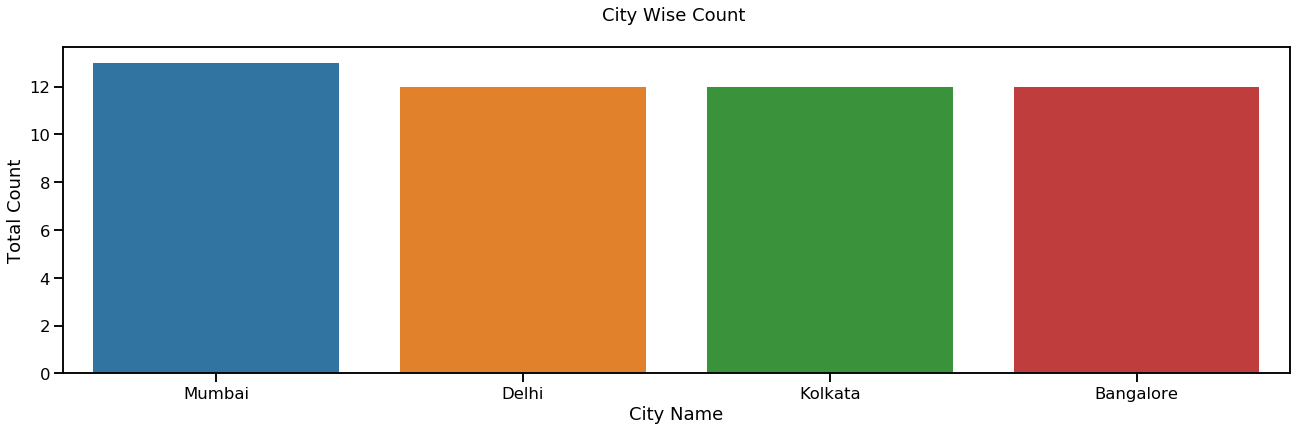

In [7]:
DataSet = DataSet.dropna()
ItemCount = DataSet["City"].value_counts().nlargest(10)
print("City Wise Count \n")
print(ItemCount)
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sn.countplot(DataSet['City'],order = DataSet['City'].value_counts().nlargest(10).index)
plt.title('City Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('City Name')

### ***Freight Cost City wise***

No handles with labels found to put in legend.


Text(0.5, 1.0, 'City Wise Freight Cost Comparision')

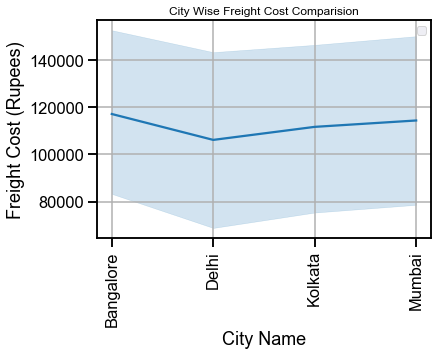

In [8]:
df = pd.read_csv("C:/Users/rohan/Desktop/Supply-chain/Dataset/invoice.csv")
dataset = df
from matplotlib import style
import seaborn as sns

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')
#sns.lineplot(DataSet['City'],order = DataSet['City'].value_counts().nlargest(10).index)
sns.lineplot(x=dataset["City"], y=dataset["Freight Cost (Rupees)"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("City Wise Count ")
plt.xlabel("City Name")
plt.ylabel("Freight Cost (Rupees)")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("City Wise Freight Cost Comparision")

Total Pack Price for City 

City
Delhi                     675.56
Kolkata                   595.19
Bangalore                 422.78
Mumbai                    365.30
Name: Pack Price, dtype: float64


Text(0.5, 0, 'City Name')

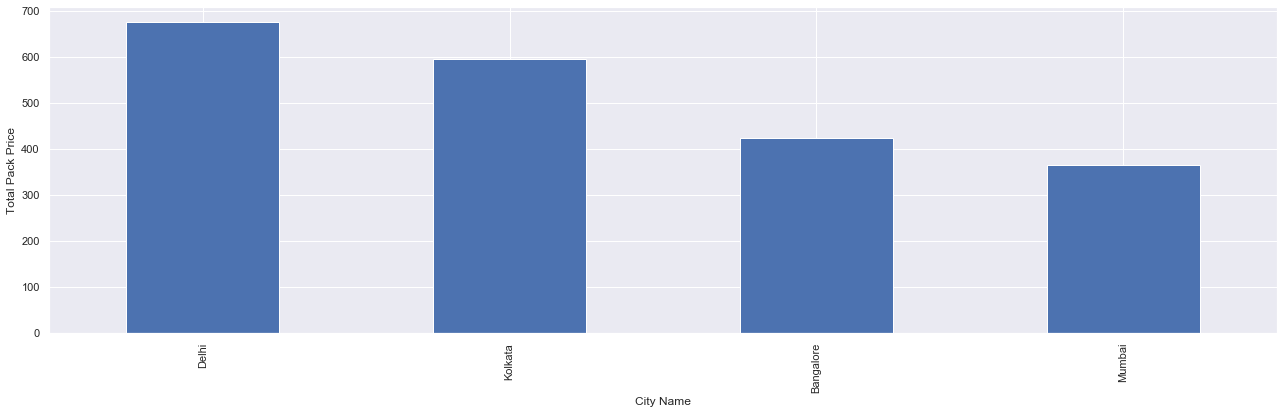

In [9]:
TotalPrice = DataSet.groupby(['City'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for City \n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=DataSet.groupby(['City'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('City Name')

###  *Total Payment Status*





Text(0.5, 0, 'Payment Status')

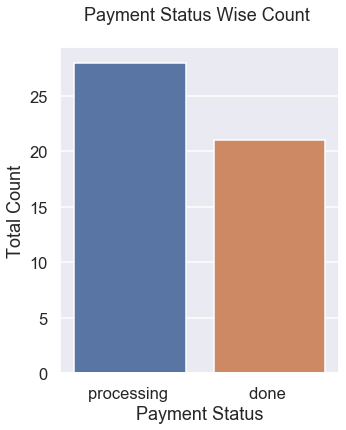

In [10]:
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(5,6))
sn.countplot(DataSet['Payment Status'],order = DataSet['Payment Status'].value_counts().nlargest(10).index)
plt.title('Payment Status Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Payment Status')

In [11]:
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")
print("done")

done


In [12]:
UniqueItem = DataSet['Manufacturing Site'].unique()
print("All Unique Manufacturing Site \n")
print(UniqueItem)

All Unique Manufacturing Site 

['R Fine  LTD' 'Aurobindo Unit III, India' 'ABBVIE GmbH & Co.KG Wiesbaden'
 'Ci,  India' 'BMS Meymac, France']


### **Analysis with respect to Different Shipment Mode** 

In [13]:
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
print ("The Max Air Shipment Mode is :",ItemData['Unit of Measure (Per Pack)'].max())
print ("The Min Air Shipment is :",ItemData['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Air Shipment is :", round(ItemTypeMean,2))

The Max Air Shipment Mode is : 270
The Min Air Shipment is : 20
The Mean Air Shipment is : 75.0


In [14]:
ItemData=DataSet[DataSet['Shipment Mode']=='Truck']
print ("The Max Truck Shipment Mode is :",ItemData['Unit of Measure (Per Pack)'].max())
print ("The Min Truck Shipment is :",ItemData['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Truck Shipment is :", round(ItemTypeMean,2))

The Max Truck Shipment Mode is : 240
The Min Truck Shipment is : 20
The Mean Truck Shipment is : 112.0


In [15]:
ItemData=DataSet[DataSet['Shipment Mode']=='Ship']
print ("The Max Ship Shipment Mode is :",ItemData['Unit of Measure (Per Pack)'].max())
print ("The Min Ship Shipment is :",ItemData['Unit of Measure (Per Pack)'].min())
ItemTypeMean = ItemData['Unit of Measure (Per Pack)'].mean()
print ("The Mean Ship Shipment is :", round(ItemTypeMean,2))

The Max Ship Shipment Mode is : 240
The Min Ship Shipment is : 100
The Mean Ship Shipment is : 157.14


Manufacturing Site
R Fine  LTD                      16
ABBVIE GmbH & Co.KG Wiesbaden    15
Aurobindo Unit III, India        12
BMS Meymac, France                3
Ci,  India                        3
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

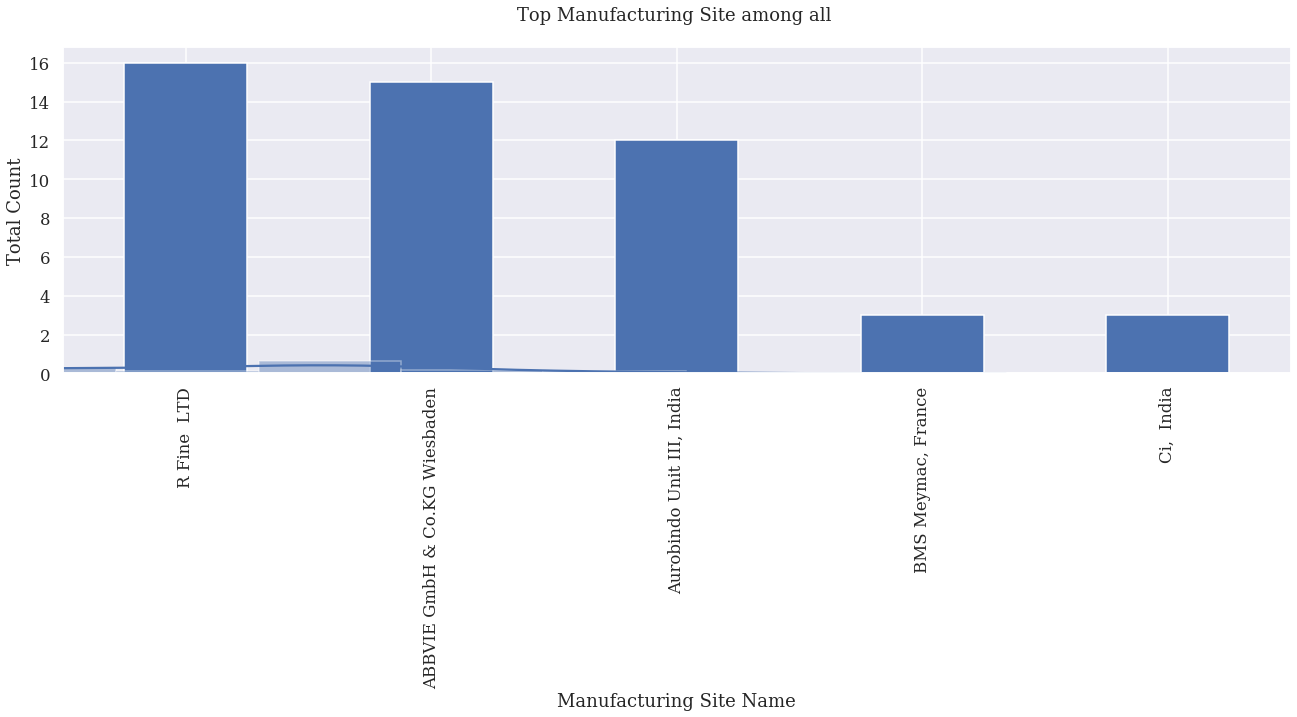

In [24]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=DataSet.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
np.random.normal(size=60)
x = np.random.normal(size=60)
import seaborn as sb
sb.distplot(x)
plt.title('Top Manufacturing Site among all \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top Air Transport Manufacturing Site 

ABBVIE GmbH & Co.KG Wiesbaden    10
Aurobindo Unit III, India         9
R Fine  LTD                       8
Ci,  India                        3
BMS Meymac, France                2
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

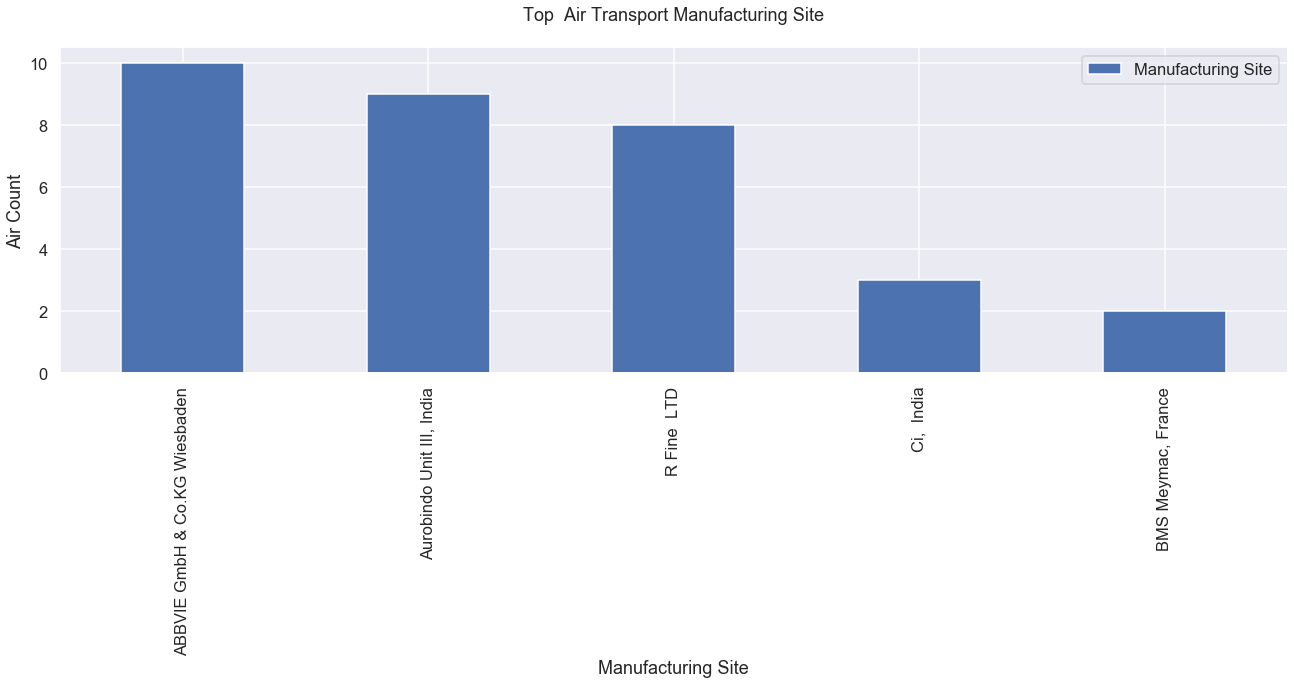

In [17]:
# Top Air Shipment Mode in Bar Chart
ItemData=DataSet[DataSet['Shipment Mode']=='Air']
DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10]
print("Top Air Transport Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top  Air Transport Manufacturing Site\n')
plt.ylabel('Air Count')
plt.xlabel('Manufacturing Site')

Top  Truck Manufacturing Site 

ABBVIE GmbH & Co.KG Wiesbaden    5
R Fine  LTD                      4
BMS Meymac, France               1
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

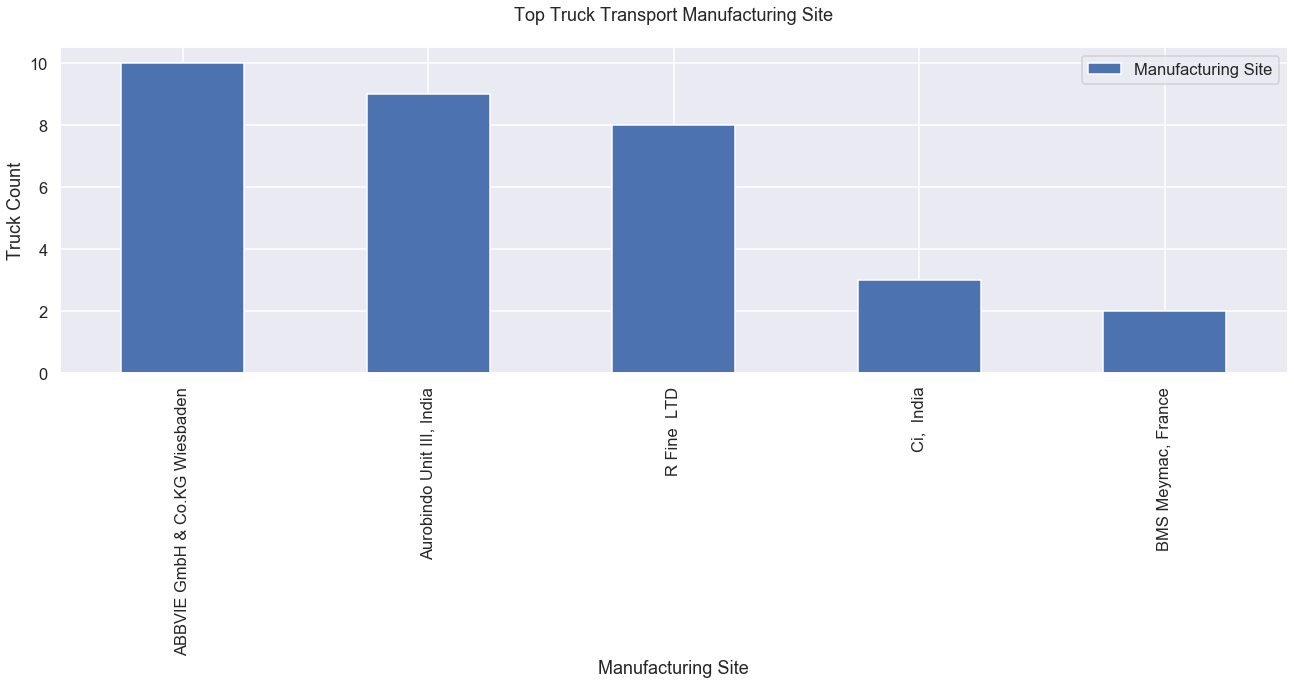

In [18]:
# Top Truck Shipment Mode in Bar Chart
ItemData=DataSet[DataSet['Shipment Mode']=='Truck']
DataSet[DataSet["Shipment Mode"]=='Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Truck']['Manufacturing Site'].value_counts()[0:10]
print("Top  Truck Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top Truck Transport Manufacturing Site\n')
plt.ylabel('Truck Count')
plt.xlabel('Manufacturing Site')

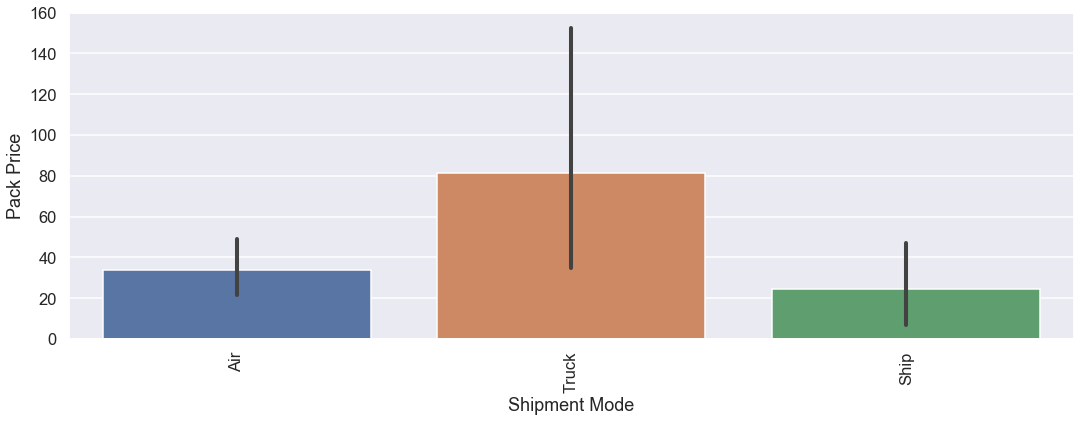

In [19]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sn.barplot('Shipment Mode','Pack Price', data = DataSet)
plt.show()

### **Total Amount spend for particular Items**

Total Price for Item 

Item Description
tyres                 1,107.30
engine                  398.04
lights                  305.65
brakes                  247.84
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Item Description')

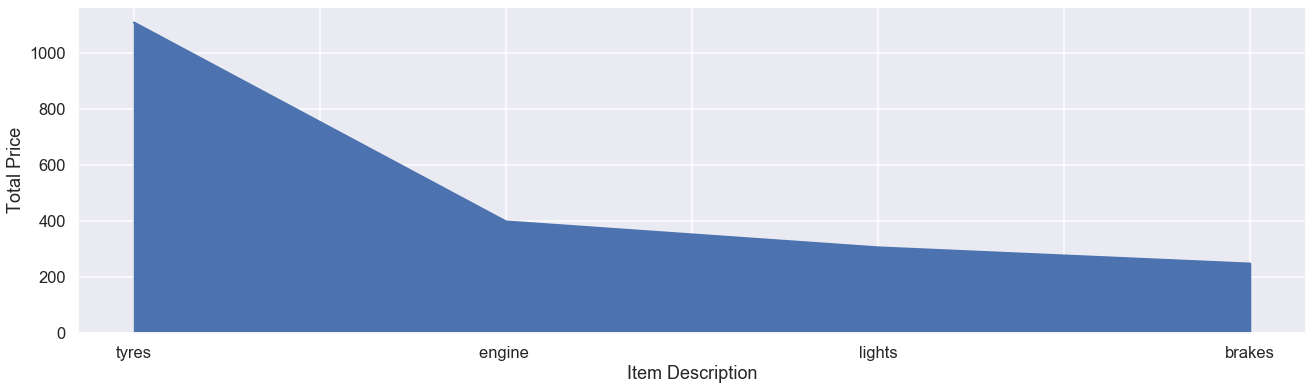

In [20]:
TotalPrice = DataSet.groupby(['Item Description'])['Pack Price'].sum().nlargest(15)
print("Total Price for Item \n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=DataSet.groupby(['Item Description'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='area')
plt.ylabel('Total Price')
plt.xlabel('Item Description')

### Quantity with respect to Region and Item

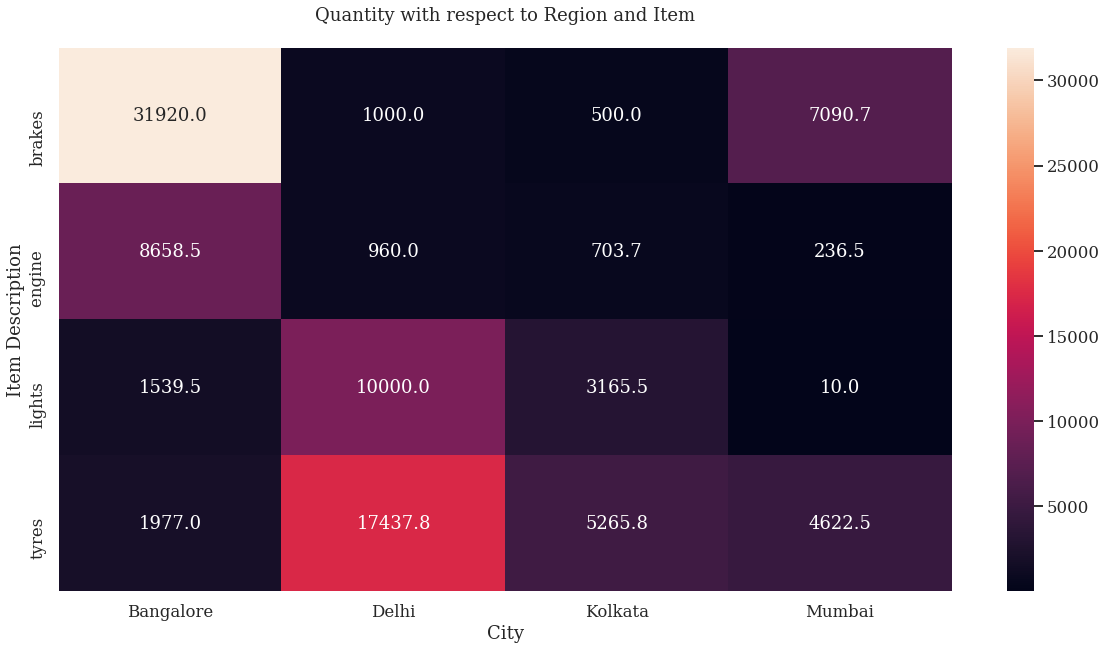

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
plt.title('Quantity with respect to Region and Item\n')
#df = pd.pivot_table(data=sns.load_dataset("/content/drive/MyDrive/data/supply_chain_ship_price/invoice.csv"),
df= pd.pivot_table(data= pd.read_csv('C:/Users/rohan/Desktop/Supply-chain/Dataset/invoice.csv'), 
index='Item Description',
values='Line Item Quantity', 
columns='City')


p = sns.heatmap(df, annot=True, fmt=".1f")

In [22]:
print(" Individual Invoice Total Amount \n \nInvoiceID        Amount")

a= DataSet["Line Item Quantity"] * DataSet["Line Item Value"] + DataSet["Freight Cost (Rupees)"] 
print(a)
print("\n Total Transaction amount: (in Rupees) ", a.sum())

 Individual Invoice Total Amount 
 
InvoiceID        Amount
0               11,249.34
1            6,204,521.50
2           20,001,653.78
3        4,065,372,743.06
4        4,620,845,450.08
5              931,770.02
6              619,162.81
7        1,013,962,770.21
8              183,309.47
9          322,266,630.47
10         322,271,283.02
11         250,051,935.58
12              65,088.13
13         998,061,240.69
14          45,065,893.24
15           8,619,191.30
16         180,075,198.35
17          66,079,850.91
18           6,466,928.42
19          80,089,156.02
20       1,518,843,808.57
21         775,124,270.63
22           2,023,113.68
23          20,655,266.24
24          40,606,793.79
25             335,821.35
26       2,000,121,723.90
27       2,000,126,376.46
28       2,000,131,029.01
29       6,348,935,681.57
30       2,700,140,334.12
31             157,690.68
32          17,149,639.23
33           1,495,091.79
34             181,444.34
35             167,821.90
36  